In [79]:
from src.data_utils import load_xsum_dict, load_shuffled_test_split

xsum_test = load_xsum_dict("test")
bart_test_extrinsic = load_shuffled_test_split(xsum_test, "bart-test-extrinsic", len(xsum_test))
print(
    len(bart_test_extrinsic),
    len(bart_test_extrinsic) / len(xsum_test)
)
pegasus_test_extrinsic = load_shuffled_test_split(xsum_test, "pegasus-test-extrinsic", len(xsum_test))
print(
    len(pegasus_test_extrinsic),
    len(pegasus_test_extrinsic) / len(xsum_test)
)

Using custom data configuration default
Reusing dataset xsum (/Users/anton164/.cache/huggingface/datasets/xsum/default/1.2.0/32c23220eadddb1149b16ed2e9430a05293768cfffbdfd151058697d4c11f934)


  0%|          | 0/3 [00:00<?, ?it/s]

6823 0.6019940003529204
6988 0.6165519675313217


In [88]:
import pandas as pd
import json
import numpy as np


def read_logs(path):
    with open(
        path,
        "r"
    ) as f:
        iteration_logs = json.load(f)

    data = []
    for iteration in iteration_logs:
        for ent_type in iteration["factuality_entities"]["type"].keys():
            ent_stats = iteration["factuality_entities"]["type"][ent_type]
            result_obj = {
                "iteration": iteration["iteration"],
                "entity_type": ent_type,
                "total": ent_stats["total"],
                "extrinsic_factual": ent_stats["Factual Hallucination"] if "Factual Hallucination" in ent_stats else 0,
                "extrinsic_non_factual": ent_stats["Non-factual Hallucination"] if "Non-factual Hallucination" in ent_stats else 0,
                "intrinsic_factual": ent_stats["Non-hallucinated"] if "Non-hallucinated" in ent_stats else 0,
                "intrinsic_non_factual": ent_stats["Intrinsic Hallucination"] if "Intrinsic Hallucination" in ent_stats else 0,
                "unknown": ent_stats["Unknown"] if "Unknown" in ent_stats else 0,
            }
            data.append(result_obj)
    
    df = pd.DataFrame(data).set_index("iteration")
    df["annotated"] = df["total"] - df["unknown"]
    return df, iteration_logs

dataset = "bart-test-extrinsic-100"
df_clf, logs_clf = read_logs(
    f"results/iteration-changes/{dataset}-classifier-knnv1.json"
)

df_clf

,entity_type,total,extrinsic_factual,extrinsic_non_factual,intrinsic_factual,intrinsic_non_factual,unknown,annotated
iteration,,,,,,,,
0,CARDINAL,21,6,6,7,2,0,21
0,DATE,35,8,20,7,0,0,35
0,EVENT,7,4,0,3,0,0,7
0,FAC,6,3,1,2,0,0,6
0,GPE,75,17,12,44,2,0,75
...,...,...,...,...,...,...,...,...
9,ORG,54,15,7,31,1,0,54
9,PERCENT,2,0,0,2,0,0,2
9,PERSON,84,19,8,51,6,0,84


In [89]:
df_clf.loc[0].sort_values("extrinsic_non_factual", ascending=False)

,entity_type,total,extrinsic_factual,extrinsic_non_factual,intrinsic_factual,intrinsic_non_factual,unknown,annotated
iteration,,,,,,,,
0,DATE,35,8,20,7,0,0,35
0,PERSON,120,28,20,68,4,0,120
0,GPE,75,17,12,44,2,0,75
0,CARDINAL,21,6,6,7,2,0,21
0,ORG,58,17,5,34,2,0,58
0,ORDINAL,8,4,3,1,0,0,8
0,MONEY,4,1,2,1,0,0,4
0,FAC,6,3,1,2,0,0,6
0,LOC,2,0,1,1,0,0,2


In [90]:
df_clf[df_clf.entity_type == "PERSON"]

,entity_type,total,extrinsic_factual,extrinsic_non_factual,intrinsic_factual,intrinsic_non_factual,unknown,annotated
iteration,,,,,,,,
0,PERSON,120,28,20,68,4,0,120
1,PERSON,116,24,17,58,5,12,104
2,PERSON,100,22,13,56,5,4,96
3,PERSON,87,19,8,49,6,5,82
4,PERSON,87,19,9,53,6,0,87
5,PERSON,85,19,8,52,6,0,85
6,PERSON,84,19,8,51,6,0,84
7,PERSON,84,19,8,51,6,0,84
8,PERSON,84,19,8,51,6,0,84


In [91]:
df_clf[df_clf.entity_type == "GPE"]

,entity_type,total,extrinsic_factual,extrinsic_non_factual,intrinsic_factual,intrinsic_non_factual,unknown,annotated
iteration,,,,,,,,
0,GPE,75,17,12,44,2,0,75
1,GPE,69,12,9,42,1,5,64
2,GPE,72,12,9,45,2,4,68
3,GPE,65,12,5,42,1,5,60
4,GPE,62,13,7,41,1,0,62
5,GPE,58,13,5,39,1,0,58
6,GPE,58,12,4,39,1,2,56
7,GPE,58,12,4,39,1,2,56
8,GPE,58,12,4,39,1,2,56


In [92]:
df_clf[df_clf.entity_type == "ORG"]

,entity_type,total,extrinsic_factual,extrinsic_non_factual,intrinsic_factual,intrinsic_non_factual,unknown,annotated
iteration,,,,,,,,
0,ORG,58,17,5,34,2,0,58
1,ORG,60,18,7,28,1,6,54
2,ORG,59,16,4,31,1,7,52
3,ORG,56,15,6,32,1,2,54
4,ORG,54,16,6,31,1,0,54
5,ORG,56,16,8,31,1,0,56
6,ORG,54,15,7,31,1,0,54
7,ORG,55,15,7,31,1,1,54
8,ORG,55,15,7,31,1,1,54


In [93]:
df_plot = df_clf[
    df_clf.entity_type.isin(["PERSON", "GPE", "ORG", "DATE", "CARDINAL"])
    & df_clf.index.isin([0, max(df_clf.index)])
]
df_plot.loc[:, "Model"] = "baseline"
df_plot.loc[max(df_clf.index), "Model"] = "GEF"
df_plot.loc[:, "extrinsic_factual_ratio"] = df_plot["extrinsic_factual"] / (
    df_plot["extrinsic_factual"] + df_plot["extrinsic_non_factual"]
)
df_plot.loc[:, "extrinsic_non_factual_ratio"] = df_plot["extrinsic_non_factual"] / (
    df_plot["extrinsic_factual"] + df_plot["extrinsic_non_factual"]
)
df_plot

/var/folders/yb/l4pdzll51k946vtlt23kftkh0000gn/T/ipykernel_71325/3190102446.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot.loc[:, "Model"] = "baseline"
/var/folders/yb/l4pdzll51k946vtlt23kftkh0000gn/T/ipykernel_71325/3190102446.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot.loc[:, "extrinsic_factual_ratio"] = df_plot["extrinsic_factual"] / (
/var/folders/yb/l4pdzll51k946vtlt23kftkh0000gn/T/ipykernel_71325/3190102446.py:10: SettingWithCopyWarning: 
A value is trying to be set on a c

,entity_type,total,extrinsic_factual,extrinsic_non_factual,intrinsic_factual,intrinsic_non_factual,unknown,annotated,Model,extrinsic_factual_ratio,extrinsic_non_factual_ratio
iteration,,,,,,,,,,,
0,CARDINAL,21,6,6,7,2,0,21,baseline,0.500000,0.500000
0,DATE,35,8,20,7,0,0,35,baseline,0.285714,0.714286
0,GPE,75,17,12,44,2,0,75,baseline,0.586207,0.413793
0,ORG,58,17,5,34,2,0,58,baseline,0.772727,0.227273
0,PERSON,120,28,20,68,4,0,120,baseline,0.583333,0.416667
9,CARDINAL,17,4,4,7,2,0,17,GEF,0.500000,0.500000
9,DATE,15,4,1,9,1,0,15,GEF,0.800000,0.200000
9,GPE,58,12,6,39,1,0,58,GEF,0.666667,0.333333
9,ORG,54,15,7,31,1,0,54,GEF,0.681818,0.318182


Text(0, 0.5, 'Factual Extrinsic Entity Ratio')

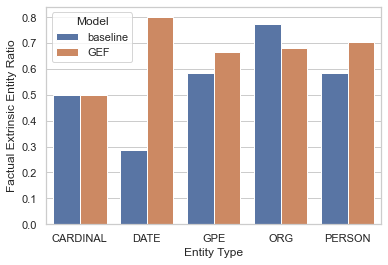

In [94]:
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.barplot(
    x="entity_type", 
    y="extrinsic_factual_ratio", 
    hue="Model", 
    data=df_plot
)

ax.set_xlabel("Entity Type")
ax.set_ylabel("Factual Extrinsic Entity Ratio")